In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/content/matches (1).csv')
delivery = pd.read_csv('/content/deliveries (1).csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-6-40e5f6bc616a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
346,172,1,153.0
348,173,1,146.0
350,174,1,143.0
352,175,1,161.0


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,IPL-2009,Centurion,22-05-2009,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN,172,153.0
172,173,IPL-2009,Johannesburg,23-05-2009,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,173,146.0
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,174,143.0
174,175,IPL-2010,Mumbai,12-03-2010,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews,Dr DY Patil Sports Academy,RE Koertzen,RB Tiffin,NaN,175,161.0


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(148, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33573,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,3,TL Suman,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
33574,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,4,TL Suman,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
33575,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,5,Jaskaran Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
33576,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,6,Jaskaran Singh,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-21-cafdf4636499>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33573,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,3,TL Suman,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0,15.0,3
33574,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,4,TL Suman,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,147.0,14.0,2
33575,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,5,Jaskaran Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,149.0,12.0,1
33576,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,6,Jaskaran Singh,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,150.0,11.0,0


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-25-5cbb94c1e6d2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115,10


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115,10


In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
32593,Deccan Chargers,Royal Challengers Bangalore,Centurion,26.0,8,4,170.0,7.714286,19.5,0


In [ ]:
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
18957,Kolkata Knight Riders,Kings XI Punjab,Kolkata,123.0,84,8,174.0,8.500000,8.785714
13162,Deccan Chargers,Chennai Super Kings,Chennai,51.0,52,8,144.0,8.205882,5.884615
27875,Chennai Super Kings,Rajasthan Royals,Kimberley,99.0,77,8,140.0,5.720930,7.714286
9095,Rajasthan Royals,Deccan Chargers,Hyderabad,116.0,72,9,214.0,12.250000,9.666667
32785,Deccan Chargers,Delhi Daredevils,Centurion,55.0,66,8,153.0,10.888889,5.000000
...,...,...,...,...,...,...,...,...,...
14966,Rajasthan Royals,Delhi Daredevils,Jaipur,119.0,77,8,156.0,5.162791,9.272727
25792,Kings XI Punjab,Kolkata Knight Riders,Port Elizabeth,18.0,13,6,153.0,7.570093,8.307692
11939,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,141.0,102,9,165.0,8.000000,8.294118
1661,Mumbai Indians,Royal Challengers Bangalore,Bangalore,29.0,22,5,142.0,6.918367,7.909091


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8592293349906774

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.01316441, 0.98683559])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target = match_progression(delivery_df,75,pipe)
temp_df

Target- 137.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10708,1,2.0,0,12.5,87.5
10716,2,14.0,0,3.3,96.7
10722,3,1.0,1,11.6,88.4
10729,4,8.0,1,18.0,82.0
10735,5,4.0,1,35.4,64.6
10741,6,9.0,0,26.9,73.1
10747,7,5.0,0,26.2,73.8
10753,8,4.0,0,26.9,73.1
10759,9,16.0,0,12.6,87.4
10766,10,6.0,0,11.3,88.7


Text(0.5, 1.0, 'Target-137.0')

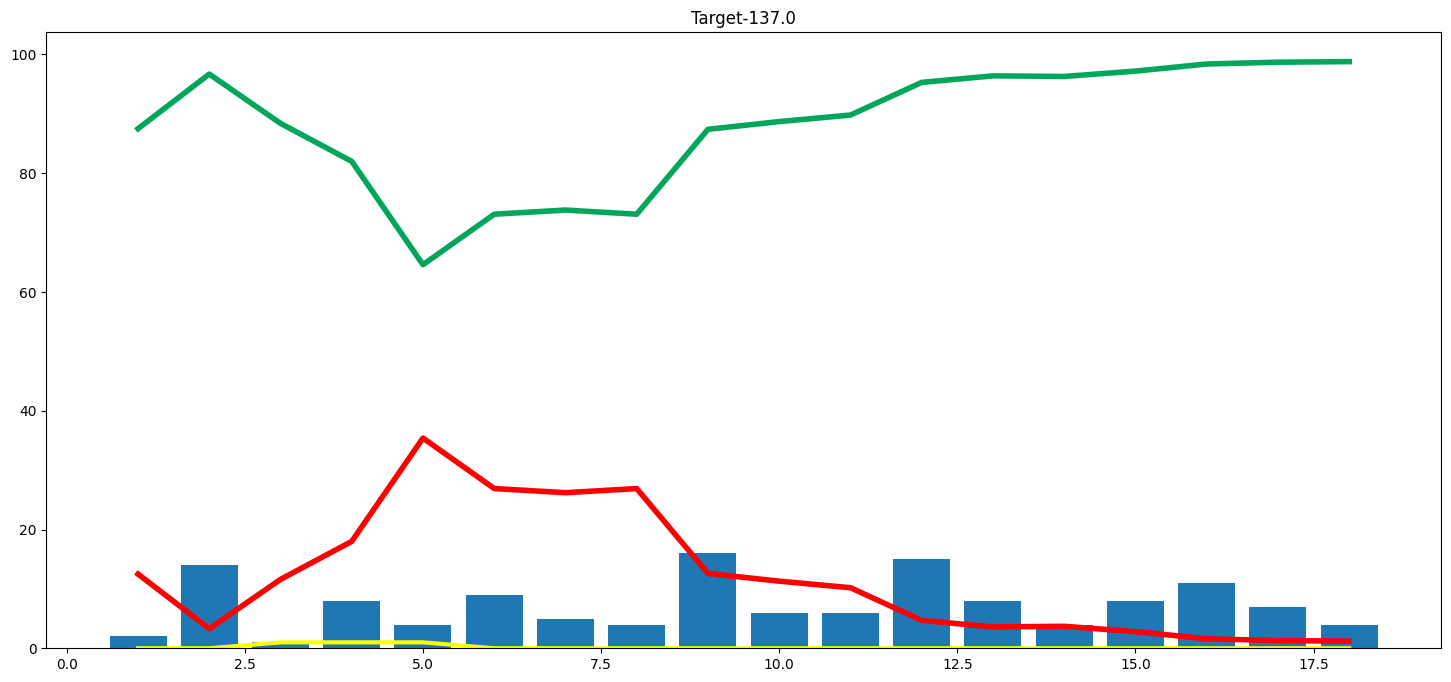

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))